# Introduction to Data Science
## Homework 3

Student Name: Rafael Garcia Cano da Costa

Student Netid: rgc292
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv("cell2cell_data.csv")
shuffled_df = df.iloc[np.random.permutation(len(df))]
train_df = shuffled_df[0:31887]
test_df = shuffled_df[31887:-1]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

The data was randomly sampled on X, because each realization (train df and test df) was sampled randomly, independently, and identically distributed. Therefore, being in a sample is independent of X.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [45]:
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

clf = skl.tree.DecisionTreeClassifier(criterion='entropy')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

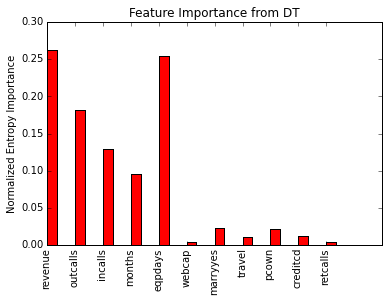

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
clf = clf.fit(train_df.ix[:,0:11], train_df.churndep)

fig, ax = plt.subplots()
width=0.35

ax.bar(np.arange(11), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_df.drop('churndep', axis=1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Entropy Importance')


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

The relationship among the top 3 drivers can vary. It seems that if the generated revenue is high, the period with the current equipment is short, and number of outcalls is high, the chance to churn is high. On the other hand, if the generated revenue is low, the period with the current equipment is long, and the number of outcalls is low, the chance to churn is high. A "real-life" connection for the first case can be a customer with no restrictions related to budget who is a good source of revenue and a frequent user of the services that can look for a better service for fulfilling personal needs. For the second case, a user less prone to use the services for budget constraints, not being a good source of revenue that tends to stay for a long period of time as customer until a better option to save by acquiring the service of another company.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

print "Accuracy_train = %.3f" % (metrics.accuracy_score(clf.predict(train_df.ix[:,0:11]), train_df.churndep)) 
print "Accuracy_test = %.3f" % (metrics.accuracy_score(clf.predict(test_df.ix[:,0:11]), test_df.churndep))

Accuracy_train = 1.000
Accuracy_test = 0.519


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [102]:
import numpy as np

split = [2, 5, 90, 160, 250, 460, 730, 980, 1300, 2000]
              
leaf = [1, 5, 90, 160, 250, 460, 730, 980, 1300, 2000]

2\. Explain in words your reasoning for choosing the above ranges.

For the split values, I started with 2 in order to evaluate a condition favorable to overfit and then increased the values to evaluate the best generalization option.
For the leaf values, I started with 1 which is the higher chance to overfit the model and then increased the values to find the best value related to the "Sweet spot".

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

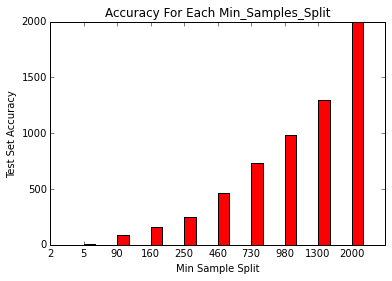

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

results=dict()
for values in split:
    results[values]=list()
    
for values in split:
    clf = skl.tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=values)
    clf = clf.fit(train_df.ix[:,0:11], train_df.churndep)
    float_formatter = lambda x: "%.3f" % x
    score = float_formatter(metrics.accuracy_score(clf.predict(test_df.ix[:,0:11]), test_df.churndep))
    results[values].append(score)
    
fig, ax = plt.subplots()
width=0.35

ax.bar(np.arange(10), split, width, color='r')
ax.set_xticks(np.arange(len(results)))
ax.set_xticklabels(split,rotation=0)
plt.title('Accuracy For Each Min_Samples_Split')
ax.set_ylabel('Test Set Accuracy')
ax.set_xlabel('Min Sample Split')

In [150]:
results[2000]

['0.589']

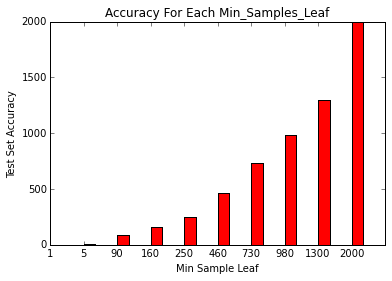

In [147]:
results2=dict()
for values in leaf:
    results2[values]=list()
    
for values in leaf:
    clf = skl.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=values)
    clf = clf.fit(train_df.ix[:,0:11], train_df.churndep)
    float_formatter = lambda x: "%.3f" % x
    score = float_formatter(metrics.accuracy_score(clf.predict(test_df.ix[:,0:11]), test_df.churndep))
    results2[values].append(score)
    
fig2, ax2 = plt.subplots()
width2=0.35

ax2.bar(np.arange(10), leaf, width2, color='r')
ax2.set_xticks(np.arange(len(results)))
ax2.set_xticklabels(leaf,rotation=0)
plt.title('Accuracy For Each Min_Samples_Leaf')
ax2.set_ylabel('Test Set Accuracy')
ax2.set_xlabel('Min Sample Leaf')

In [151]:
results2[2000]

['0.588']

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

Both configurations had very similar best accuracy when min_samples_split = 2000 or min_samples_leaf = 2000, but the min_samples_split had accuracy = .589 (the highest) while min_samples_leaf had accuracy = .588.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

In a working environment, I would use this model to minimize customer's churning. My main focus would address customers generating higher levels of revenue. I would suggest contacting the customers predicted by the model in advance offering financial advantages in case they accepted an extension on their contracts. Also, I would suggest a different approach for customers generating low level of revenue where the advantages would not comprise reductions in charges, since they don't have much leverage on that, but maybe a certainty of no increase in charges within a period after renewing their contracts. The churn prediction can be good for the business, because it can help  the company to avoid loosing high revenue generators. Even if this kind of customer is not intending to churn, the company can establish a good relationship with him increasing the chances to keep him as a customer. In case of low revenue generators, the company maybe would not get greats benefits individually from them, but if it doen't give money away, keeping them can be a good safe resource of revenue in a long term since they tend to keep longer bonds with the company. 